**ASSINGMENT 10 By Sahil Kumar**


Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).

1. Convert text to lowercase and remove punctuaƟon using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribuƟon (excluding stopwords).

In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt_tab')
nltk.download('stopwords')

paragraph = """Basketball has embraced technology in exciting ways, with Artificial Intelligence playing a major role. AI systems analyze player statistics, shot accuracy, and defensive strategies to help teams gain a competitive edge. Coaches use real-time data to make substitutions and tactical decisions during games. Fans also benefit, with AI powering personalized content and highlights. As AI tools become more advanced, they're changing how basketball is played, coached, and experienced around the world."""

# 1. Lowercase and remove punctuation
text_clean = re.sub(r'[^\w\s]', '', paragraph.lower())
print("Cleaned Text:", text_clean)

# 2. Tokenize sentences and words
sent_tokens = sent_tokenize(paragraph)
word_tokens_nltk = word_tokenize(text_clean)
word_tokens_split = text_clean.split()

# 3. Compare split() vs word_tokenize()
print("Split():", word_tokens_split)
print("word_tokenize():", word_tokens_nltk)

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens_nltk if word not in stop_words]
print("Filtered Words:", filtered_words)

# 5. Word Frequency Distribution
freq_dist = Counter(filtered_words)
print("Word Frequency:", freq_dist)

Cleaned Text: basketball has embraced technology in exciting ways with artificial intelligence playing a major role ai systems analyze player statistics shot accuracy and defensive strategies to help teams gain a competitive edge coaches use realtime data to make substitutions and tactical decisions during games fans also benefit with ai powering personalized content and highlights as ai tools become more advanced theyre changing how basketball is played coached and experienced around the world
Split(): ['basketball', 'has', 'embraced', 'technology', 'in', 'exciting', 'ways', 'with', 'artificial', 'intelligence', 'playing', 'a', 'major', 'role', 'ai', 'systems', 'analyze', 'player', 'statistics', 'shot', 'accuracy', 'and', 'defensive', 'strategies', 'to', 'help', 'teams', 'gain', 'a', 'competitive', 'edge', 'coaches', 'use', 'realtime', 'data', 'to', 'make', 'substitutions', 'and', 'tactical', 'decisions', 'during', 'games', 'fans', 'also', 'benefit', 'with', 'ai', 'powering', 'persona

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 Q2 Using the same paragraph from Q1:

1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmaƟzaƟon with WordNetLemmaƟzer
5. Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over the other.

In [2]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# 1. Extract alphabet-only words
words_alpha = re.findall(r'\b[a-zA-Z]+\b', text_clean)

# 2. Remove stopwords again
filtered_alpha = [word for word in words_alpha if word not in stop_words]

# 3. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_alpha]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_alpha]

# 5. Comparison
print("Stemmed:", stemmed_words)
print("Lemmatized:", lemmatized_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Stemmed: ['basketbal', 'embrac', 'technolog', 'excit', 'way', 'artifici', 'intellig', 'play', 'major', 'role', 'ai', 'system', 'analyz', 'player', 'statist', 'shot', 'accuraci', 'defens', 'strategi', 'help', 'team', 'gain', 'competit', 'edg', 'coach', 'use', 'realtim', 'data', 'make', 'substitut', 'tactic', 'decis', 'game', 'fan', 'also', 'benefit', 'ai', 'power', 'person', 'content', 'highlight', 'ai', 'tool', 'becom', 'advanc', 'theyr', 'chang', 'basketbal', 'play', 'coach', 'experienc', 'around', 'world']
Lemmatized: ['basketball', 'embraced', 'technology', 'exciting', 'way', 'artificial', 'intelligence', 'playing', 'major', 'role', 'ai', 'system', 'analyze', 'player', 'statistic', 'shot', 'accuracy', 'defensive', 'strategy', 'help', 'team', 'gain', 'competitive', 'edge', 'coach', 'use', 'realtime', 'data', 'make', 'substitution', 'tactical', 'decision', 'game', 'fan', 'also', 'benefit', 'ai', 'powering', 'personalized', 'content', 'highlight', 'ai', 'tool', 'become', 'advanced', 't

Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).

1. Use CountVectorizer to generate the Bag of Words representaƟon.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "LeBron James leads Lakers to victory with 35 points.",
    "India clinches the T20 series against Australia in a thrilling finale.",
    "Novak Djokovic wins his 24th Grand Slam title at the US Open."
]

# 1. Bag of Words
cv = CountVectorizer()##This is a key tool for converting text into numerical features
bow = cv.fit_transform(texts)
print("BoW Features:\n", cv.get_feature_names_out())

# 2. TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)

# 3. Top 3 keywords
import numpy as np

for i, text in enumerate(texts):
    scores = tfidf_matrix[i].toarray().flatten()
    top_indices = np.argsort(scores)[-3:][::-1]
    top_words = [tfidf.get_feature_names_out()[j] for j in top_indices]
    print(f"Text {i+1} Top Keywords: {top_words}")

BoW Features:
 ['24th' '35' 'against' 'at' 'australia' 'clinches' 'djokovic' 'finale'
 'grand' 'his' 'in' 'india' 'james' 'lakers' 'leads' 'lebron' 'novak'
 'open' 'points' 'series' 'slam' 't20' 'the' 'thrilling' 'title' 'to' 'us'
 'victory' 'wins' 'with']
Text 1 Top Keywords: ['with', 'victory', 'to']
Text 2 Top Keywords: ['t20', 'thrilling', 'series']
Text 3 Top Keywords: ['wins', 'us', 'title']


Q4.  Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).

1. Preprocess and tokenize both texts.
2. Calculate: a. Jaccard Similarity using sets b. Cosine Similarity using TfidfVectorizer + cosine_similarity() c. Analyze which similarity metric gives beƩer insights in your case.

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

text1 = "LeBron James is known for his powerful athleticism, basketball IQ, and leadership on and off the court."
text2 = "Stephen Curry is renowned for his shooting ability, quick release, and leadership in the game of basketball."

# 1. Preprocess
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return set(word_tokenize(text))

set1, set2 = preprocess(text1), preprocess(text2)

# 2a. Jaccard Similarity formula = intersection of words / union of words
jaccard = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard)

# 2b. Cosine Similarity
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform([text1, text2])
cosine = cosine_similarity(tfidf_vectors[0], tfidf_vectors[1])[0][0]
print("Cosine Similarity:", cosine)


Jaccard Similarity: 0.2692307692307692
Cosine Similarity: 0.2934612250187739


Q5. Write a short review for a product or service.

1. Use TextBlob or VADER to find polarity & subjecƟvity for each review.
2. Classify reviews into PosiƟve / NegaƟve / Neutral.
3. Create a word cloud using the wordcloud library for all posiƟve reviews.

Polarity: 0.6666666666666666
Subjectivity: 0.7666666666666666
Sentiment: Positive


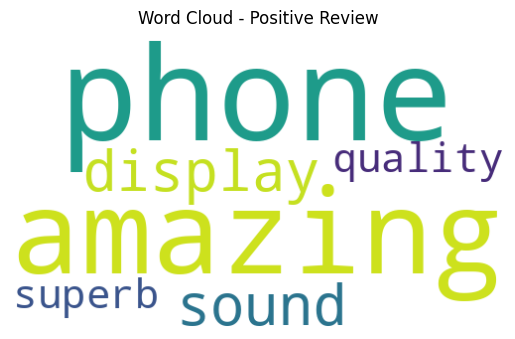

In [6]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review="The phone has an amazing display, and the sound quality is superb."

# 1. Sentiment
blob = TextBlob(review)
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

# 2. Classification
if blob.sentiment.polarity > 0.1:
    sentiment = "Positive"
elif blob.sentiment.polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"
print("Sentiment:", sentiment)

# 3. WordCloud (for positive reviews)
if sentiment == "Positive":
    wc = WordCloud(width=500, height=300, background_color='white').generate(review)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud - Positive Review")
    plt.show()

In [2]:
!pip install tensorflow


Q6. Choose your own paragraph (~100 words) as training data.

1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starƟng from any seed word you provide.

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# Sample text data
text = """Cognitive computing involves simulating human thought processes in a computerized model.
It uses machine learning, natural language processing, and artificial intelligence to create systems
capable of reasoning and decision-making. These systems learn from data, adapt over time, and make
informed decisions to solve complex problems. Cognitive computing is increasingly being used across
various industries like healthcare, finance, and retail."""
# 1. Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# 2. Creating n-gram sequences
input_sequences = []
words = text.lower().split()
for i in range(1, len(words)):
    n_gram_sequence = words[:i+1]
    sequence = tokenizer.texts_to_sequences([' '.join(n_gram_sequence)])[0]
    input_sequences.append(sequence)

# Padding sequence
max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]

# 3. Model definition
model = Sequential([
    Embedding(input_dim=total_words, output_dim=10, input_length=max_len - 1),
    LSTM(50),
    Dense(total_words, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=0)

# 4. Generate new text
seed = "cognitive"
for _ in range(5):
    token_seq = tokenizer.texts_to_sequences([seed])[0]
    token_seq = pad_sequences([token_seq], maxlen=max_len - 1, padding='pre')
    predicted_probs = model.predict(token_seq, verbose=0)
    predicted_index = np.argmax(predicted_probs)
    next_word = tokenizer.index_word.get(predicted_index, '')
    seed += " " + next_word

print("Generated Text:", seed)

Generated Text: cognitive simulating simulating simulating simulating processes
